# Avance Proyecto

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

d002 -> Tarakawa, Kiribati (1.3320m 172.01300)
d003 -> Baltra, Ecuador (-0.43700, -90.28500)
d004 -> Nauru, Nauru (-0.52800, 166.90500)
d011 -> Christmas, Kiribati (1.98500, -157.47700)
d013 -> Kanton, Kiribati (-2.81000, -171.71800)
d029 -> Kapingamarangi, Micronesia (1.09800, 154.77700) 
d030 -> Santa Cruz, Ecuador (-0.75500, -90.31300)
d091 -> La Libertad, Ecuador (-2.20000, -80.91700)
d092 -> Talara, Peru (-4.58200, -81.28200)
d400 -> Lombrum, Papua New Guinea (-2.03300, 147.36700)

In [2]:
#Sea level datafram
df = pd.read_csv('d002.csv', names=['Year', 'Month', 'Day', 'd002'])
df.head()

,Year,Month,Day,d002
0,1992,12,4,1711
1,1992,12,5,1693
2,1992,12,6,1671
3,1992,12,7,1680
4,1992,12,8,1700


In [3]:
# Merge

df_names = ['d003', 'd004', 'd011', 'd013', 'd029', 'd030', 'd091', 'd092', 'd400']

for n in df_names:
    path = '{}.csv'.format(n)
    d_right = pd.read_csv(path, names=['Year', 'Month', 'Day', n])
    df = df.merge(d_right, how='outer', on=['Year', 'Month', 'Day'])


In [4]:
df.sort_values(by=['Year', 'Month', 'Day'], inplace=True)
df.reset_index(inplace=True)

df

,index,Year,Month,Day,d002,d003,d004,d011,d013,d029,d030,d091,d092,d400
0,17957,1949,9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2166.0,NaN,NaN
1,17958,1949,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.0,NaN,NaN
2,17959,1949,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2092.0,NaN,NaN
3,17960,1949,9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2081.0,NaN,NaN
4,17961,1949,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2130.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26230,10431,2021,6,26,1692.0,1880.0,1507.0,NaN,1071.0,1029.0,1522.0,NaN,NaN,794.0
26231,10432,2021,6,27,1672.0,1905.0,1473.0,NaN,1052.0,1014.0,1512.0,NaN,NaN,790.0
26232,10433,2021,6,28,1658.0,1914.0,1460.0,NaN,1040.0,NaN,1509.0,NaN,NaN,802.0
26233,10434,2021,6,29,1678.0,1922.0,1480.0,NaN,1072.0,NaN,1504.0,NaN,NaN,814.0


In [5]:
df.to_csv('dataframe.csv')

## 3) Relacion entre periodo de 1970-1984 a 1984-2020

In [6]:
# Dataframe 1970 a 1984
df_70_84 = df.loc[(df['Year']>=1970) & (df['Year']<=1984) ]

# Dataframe 1985 - 2020
df_85_20 = df.loc[ (df['Year']>1984) & (df['Year']<= 2020) ]

In [7]:
df_70_84.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479 entries, 7426 to 12904
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   5479 non-null   int64  
 1   Year    5479 non-null   int64  
 2   Month   5479 non-null   int64  
 3   Day     5479 non-null   int64  
 4   d002    0 non-null      float64
 5   d003    0 non-null      float64
 6   d004    0 non-null      float64
 7   d011    3981 non-null   float64
 8   d013    4627 non-null   float64
 9   d029    2306 non-null   float64
 10  d030    2265 non-null   float64
 11  d091    5479 non-null   float64
 12  d092    0 non-null      float64
 13  d400    0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 642.1 KB


In [8]:
# Valores nulos por estacion
df_70_84.isnull().sum()

index       0
Year        0
Month       0
Day         0
d002     5479
d003     5479
d004     5479
d011     1498
d013      852
d029     3173
d030     3214
d091        0
d092     5479
d400     5479
dtype: int64

In [9]:
# Solo se analizará la estacion 011, 013, 029, 030, 091
df_70_84 = df_70_84[['Year','Month','Day', 'd011', 'd013','d029','d030','d091']]
df_70_84

,Year,Month,Day,d011,d013,d029,d030,d091
7426,1970,1,1,NaN,NaN,NaN,NaN,2242.0
7427,1970,1,2,NaN,NaN,NaN,NaN,2232.0
7428,1970,1,3,NaN,NaN,NaN,NaN,2210.0
7429,1970,1,4,NaN,NaN,NaN,NaN,2197.0
7430,1970,1,5,NaN,NaN,NaN,NaN,2194.0
...,...,...,...,...,...,...,...,...
12900,1984,12,27,637.0,1104.0,1063.0,1404.0,2381.0
12901,1984,12,28,624.0,1073.0,1068.0,1400.0,2357.0
12902,1984,12,29,645.0,1065.0,1074.0,1386.0,2341.0
12903,1984,12,30,646.0,1083.0,1077.0,1379.0,2356.0


In [10]:
df_70_84.isnull().sum()

Year        0
Month       0
Day         0
d011     1498
d013      852
d029     3173
d030     3214
d091        0
dtype: int64

In [11]:
df_85_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13149 entries, 12905 to 26053
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   13149 non-null  int64  
 1   Year    13149 non-null  int64  
 2   Month   13149 non-null  int64  
 3   Day     13149 non-null  int64  
 4   d002    10255 non-null  float64
 5   d003    13065 non-null  float64
 6   d004    10039 non-null  float64
 7   d011    13149 non-null  float64
 8   d013    13149 non-null  float64
 9   d029    13149 non-null  float64
 10  d030    13149 non-null  float64
 11  d091    13149 non-null  float64
 12  d092    2042 non-null   float64
 13  d400    9591 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.5 MB


In [12]:
df_85_20 = df_85_20[['Year','Month','Day', 'd011', 'd013','d029','d030','d091']]
df_85_20

,Year,Month,Day,d011,d013,d029,d030,d091
12905,1985,1,1,628.0,1061.0,1048.0,1431.0,2340.0
12906,1985,1,2,640.0,1056.0,1094.0,1438.0,2331.0
12907,1985,1,3,622.0,1046.0,1099.0,1415.0,2299.0
12908,1985,1,4,611.0,1035.0,1068.0,1413.0,2299.0
12909,1985,1,5,623.0,1021.0,1077.0,1406.0,2279.0
...,...,...,...,...,...,...,...,...
26049,2020,12,27,607.0,1076.0,-32767.0,1479.0,2380.0
26050,2020,12,28,596.0,1068.0,-32767.0,1482.0,2378.0
26051,2020,12,29,610.0,1083.0,-32767.0,1502.0,2400.0
26052,2020,12,30,637.0,1091.0,1132.0,1497.0,2420.0


In [13]:
# Valores nulos
df_85_20.isnull().sum()

Year     0
Month    0
Day      0
d011     0
d013     0
d029     0
d030     0
d091     0
dtype: int64

In [14]:
# Valores atipicos (-32767) solo en la estacion d011

df_85_20.loc[df_85_20['d011']== -32767]

,Year,Month,Day,d011,d013,d029,d030,d091
15417,1991,11,18,-32767.0,1166.0,1023.0,1566.0,2523.0
15418,1991,11,19,-32767.0,1194.0,1013.0,1577.0,2548.0
15419,1991,11,20,-32767.0,1196.0,1040.0,1578.0,2571.0
15420,1991,11,21,-32767.0,1190.0,1047.0,1577.0,2569.0
15421,1991,11,22,-32767.0,1176.0,993.0,1572.0,2561.0
...,...,...,...,...,...,...,...,...
24588,2016,12,27,-32767.0,1078.0,1129.0,1511.0,2481.0
24589,2016,12,28,-32767.0,1064.0,1098.0,1525.0,2500.0
24590,2016,12,29,-32767.0,1051.0,1077.0,1525.0,2492.0
24591,2016,12,30,-32767.0,1061.0,1113.0,1502.0,2482.0


In [15]:
# Remplazar valores atipicos por NaN

df_85_20.replace(-32767, np.NaN, inplace=True)#Reemplazar por NaN

In [16]:
df_85_20['d011'] = df_85_20['d011'].fillna(df_85_20.groupby('Year')['d011'].transform('mean'))
df_85_20['d013'] = df_85_20['d013'].fillna(df_85_20.groupby('Year')['d013'].transform('mean'))
df_85_20['d029'] = df_85_20['d029'].fillna(df_85_20.groupby('Year')['d029'].transform('mean'))
df_85_20['d030'] = df_85_20['d030'].fillna(df_85_20.groupby('Year')['d030'].transform('mean'))
df_85_20['d091'] = df_85_20['d091'].fillna(df_85_20.groupby('Year')['d091'].transform('mean'))



In [17]:
df_85_20.isnull().sum()

Year        0
Month       0
Day         0
d011        0
d013     1460
d029     1461
d030        0
d091        0
dtype: int64

### Visualizaciones

In [ ]:
#df_85_20=df_85_20[['Year','d011','d013', 'd029', 'd030', 'd091']].groupby('Year').mean()

In [18]:

df_p=df_85_20.dropna()

In [19]:
df_p.isnull().any()

Year     False
Month    False
Day      False
d011     False
d013     False
d029     False
d030     False
d091     False
dtype: bool

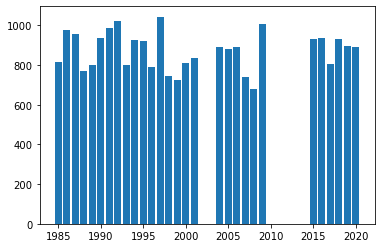

In [21]:

years = df_p['Year'].values

estacion = df_p['d011'].values


plt.bar(years,estacion)
plt.show()

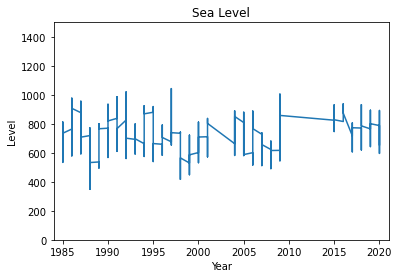

In [20]:
#%matplotlib inline

#df_85_20.hist(column='d011', figsize=(5,10))

# switch to a line plot
plt.plot(df_p['Year'].values, df_p['d011'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('Level')

#label the figure
plt.title('Sea Level')

# to make more honest, start they y axis at 0
plt.axis([1984, 2021,0,1500])

plt.show()